## Quantum Energy Teleportation protocol for long distances

Protocol that improves energy teleportation between qubits far apart.

The protocol uses the twos qibuts in the Minimal Model but teleports the state of Bob's qubits to another qubit C localized in a long distance from qubits A and B.

There are two versions of this protocol, one proposed by the article ____ wich this code is based and my modified version, differences between both are presented further.

### Import packages

Import necessary packages to create and simulate the protocol

In [21]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

## Article proposed circuits

The article proposes a circuit that executes the Minimal Model with no changes. Them, the state of qubit B is teleported to another qubit C using Quantum State Teleportation.

This implementation does not succeed in energy teleportation to qubit C because the energy extractation happens when the conditional operations are exectuded between qubits A and B. This implementation merely teleports a state that already executed the energy teleportation, the state of qubit C before the state teleportation has lower energy than after and thus no energy is extracted from it.

### Circuit for measurement of the local hamiltoninan $Z$ or $H$

In [22]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

def QET_QST_Z(k,h):
    qr1 = QuantumRegister(4)
    cr1 = ClassicalRegister(4,"alpha")
    qc1 = QuantumCircuit(qr1, cr1)
    
    #Prepare the ground state
    alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc1.ry(2*alpha,qr1[0])
    qc1.cx(qr1[0],qr1[1])
    
    # Alice's projective measurement
    qc1.h(qr1[0])

    #Bob's conditional operation
    phi=0.5*np.arcsin(sin(k,h))
    qc1.cry(-2*phi,qr1[0],qr1[1])
    
    qc1.x(qr1[0])
    qc1.cry(2*phi,qr1[0],qr1[1])
    qc1.x(qr1[0])

    qc1.measure([1],[1])
    
    # Teleport Quantum State after the measurement 
    #create Bell pair
    qc1.h(qr1[2])
    qc1.cx(qr1[2],qr1[3])
    
    #Bell measurement
    qc1.cx(qr1[1],qr1[2])
    qc1.h(qr1[1])
    
    #Equivalent to conditional operation
    qc1.cx(qr1[2],qr1[3])
    qc1.cz(qr1[1],qr1[3])

    qc1.measure([0,2,3], [0,2,3])
    return qc1

### Circuit for measurement of the local hamiltoninan $XX$ or $V$

In [23]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

def QET_QST_XX(k,h):
    qr1 = QuantumRegister(4)
    cr1 = ClassicalRegister(4,"alpha")
    qc1 = QuantumCircuit(qr1, cr1)
    
    #Prepare the ground state
    alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc1.ry(2*alpha,qr1[0])
    qc1.cx(qr1[0],qr1[1])
    
    # Alice's projective measurement
    qc1.h(qr1[0])

    #Bob's conditional operation
    phi=0.5*np.arcsin(sin(k,h))
    qc1.cry(-2*phi,qr1[0],qr1[1])
    
    qc1.x(qr1[0])
    qc1.cry(2*phi,qr1[0],qr1[1])
    qc1.x(qr1[0])
    
    #Measurement of the interaction XX
    # Comment out qc.h(qr[1]) below for the measurement of Bob's Z term
    qc1.h(qr1[1])
    qc1.measure([1],[1])
    
    # Teleport Quantum State after the measurement 
    #create Bell pair
    qc1.h(qr1[2])
    qc1.cx(qr1[2],qr1[3])
    
    #Bell measurement
    qc1.cx(qr1[1],qr1[2])
    qc1.h(qr1[1])
    
    #Equivalent to conditional operation
    qc1.cx(qr1[2],qr1[3])
    qc1.cz(qr1[1],qr1[3])

    qc1.measure([0,2,3], [0,2,3])
    return qc1

### Show circuit

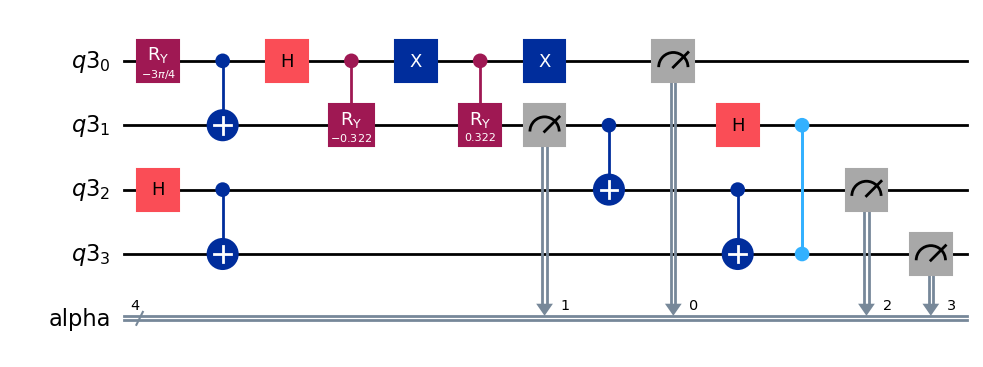

In [24]:
qc = QET_QST_Z(1,1)
qc.draw('mpl')

## Modified circuits

My implementation of the long distance energy teleportation protocol. In this version the state of B is teleportation before the conditional operations between A and B.

One of the characteristics of the State Teleportation Protocol is that the relations (such as entaglament) of the teleported state is also teleported, this means that instead of appliyng the conditionals operations between A and B we can apply them between A and C with the same results. Thus, energy is succefully teleported from A to C after the state teleportation and is extracted after conditionals operations between A and C.

### Circuit for measurement of the local hamiltoninan $Z$ or $H$

In [25]:
def qt_Z(h,k):
   qc = QuantumCircuit(4)
    
   #Prepare the ground state
   theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
   qc.ry(2*theta,0)
   qc.cx(0,1)

   # Alice's projective measurement
   qc.barrier()
   qc.h(0)

   ## Teleport Activated State
   #create Bell pair
   qc.barrier()
   qc.h(2)
   qc.cx(2,3)

   # Prepare state teleportation
   qc.barrier()
   qc.cx(1,2)
   qc.h(1)

   # Condicional operation for state teleportation
   qc.barrier()
   qc.cx(2,3)
   qc.cz(1,3)

   # Energy extraction conditional operations on teleported state
   qc.barrier()
   phi = 0.5*np.arcsin((h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2))

   qc.cry(-2*phi,0,3)

   qc.x(0)
   qc.cry(2*phi,0,3)
   qc.x(0)

   # Measurements
   qc.measure_all()

   return qc

### Circuit for measurement of the local hamiltoninan $XX$ or $V$

In [26]:
def qt_XX(h,k):
    qc = QuantumCircuit(4)
    
    #Prepare the ground state
    theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc.ry(2*theta,0)
    qc.cx(0,1)

    # Alice's projective measurement
    qc.barrier()
    qc.h(0)

    ## Teleport Activated State
    #create Bell pair
    qc.barrier()
    qc.h(2)
    qc.cx(2,3)

    # Prepare state teleportation
    qc.barrier()
    qc.cx(1,2)
    qc.h(1)

    # Condicional operation for state teleportation
    qc.barrier()
    qc.cx(2,3)
    qc.cz(1,3)

    # Energy extraction conditional operations on teleported state
    qc.barrier()
    phi = 0.5*np.arcsin((h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2))

    qc.cry(-2*phi,0,3)

    qc.x(0)
    qc.cry(2*phi,0,3)
    qc.x(0)

    # Measurements
    qc.barrier()
    qc.h(3)
    qc.measure_all()

    return qc

### Show circuit

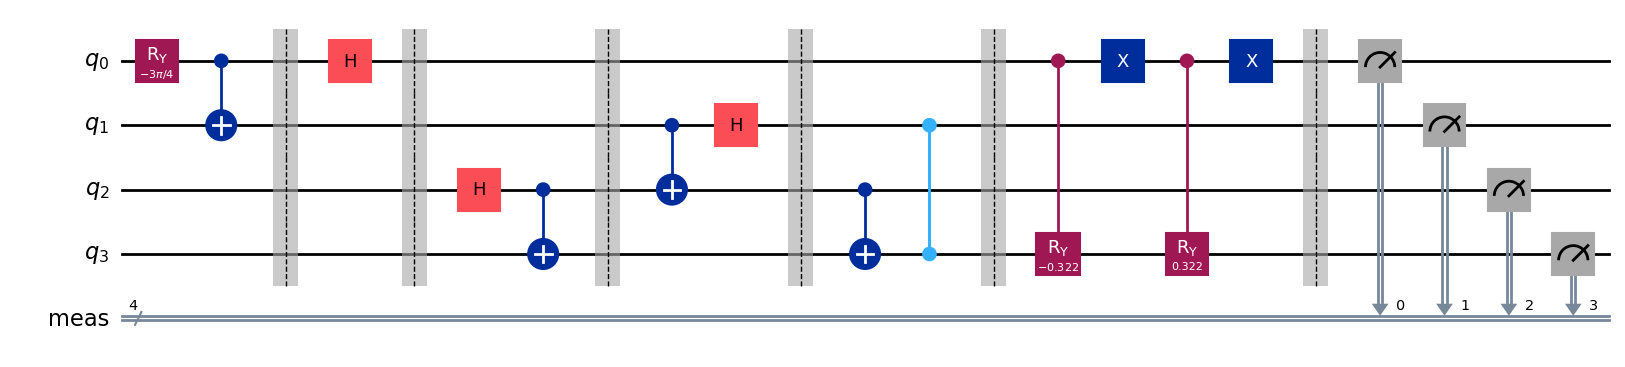

In [27]:
qc = qt_Z(1,1)
qc.draw('mpl')

## Original circuit vs Modified circuit

Simulate both circuits with aer_simulator and compare the results

In [28]:
# Initiate simulator
simulator = AerSimulator()

# Parameters
h = 1.5; k = 1;
n_shots = 100000

# Generate circuit
qc1 = QET_QST_Z(h, k)
qcA = transpile(qc1, simulator, optimization_level=3)

qc2 = QET_QST_XX(h, k)
qcB = transpile(qc2, simulator, optimization_level=3)

qc3= qt_Z(h, k)
qcC = transpile(qc3, simulator, optimization_level=3)

qc4= qt_XX(h, k)
qcD = transpile(qc4, simulator, optimization_level=3)

# Run job with Sampler
jobA= simulator.run([qcA], shots=n_shots)
jobB= simulator.run([qcB], shots=n_shots)
jobC= simulator.run([qcC], shots=n_shots)
jobD= simulator.run([qcD], shots=n_shots)


### Measurement of $H_B$

Show results of circuits that measure $H_B$

H_B = 0.7663654415067657 ± 0.004492165931819527


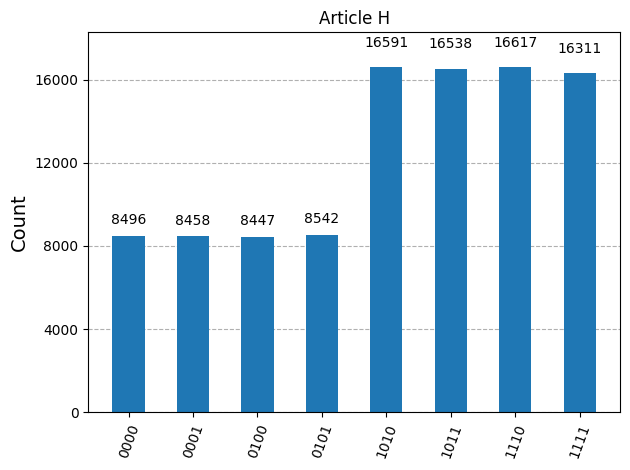

In [29]:
# Extract results
result = jobA.result()
counts = result.get_counts()

# Energies
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_A += h*(-1)**int(bit_string[0])*count/n_shots
        ene_B += h*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Save result
Article_H = ene_B

# Print results
print(f"H_B = {ene_B} ± {np.std(error_B)/np.sqrt(n_shots)}")
plot_histogram(counts, title="Article H")

H_B = 0.3448654415067657 ± 0.0037870987522112486


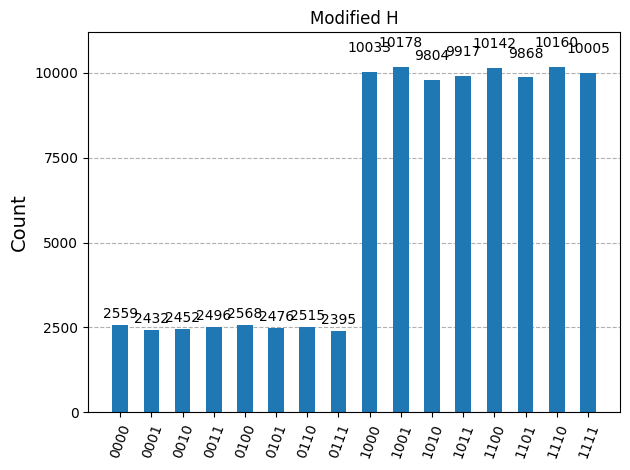

In [30]:
# Extract results
result = jobC.result()
counts = result.get_counts()

# Energies
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_A += h*(-1)**int(bit_string[0])*count/n_shots
        ene_B += h*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Save result
Modified_H = ene_B

# Print results
print(f"H_B = {ene_B} ± {np.std(error_B)/np.sqrt(n_shots)}")
plot_histogram(counts, title="Modified H")

### Measurement of $V$

Show results for circuits that measure $V$

V = -0.7855996075495417 ± 0.002022313032149078


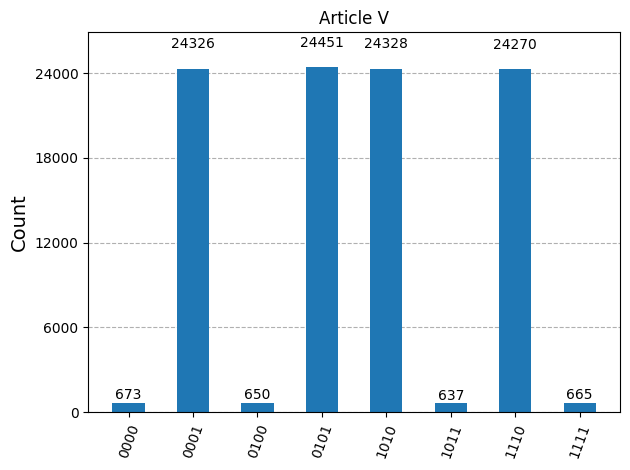

In [31]:
# Extract results
result = jobB.result()
counts = result.get_counts()

# Energy
ene_V=(2*k**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_V=[]

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_V += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_V.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

# Save result
Article_V = ene_V

# Print results
print(f"V = {ene_V} ± {np.std(error_V)/np.sqrt(n_shots)}")
plot_histogram(counts, title="Article V")

V = -0.49139960754954154 ± 0.003791357751518576


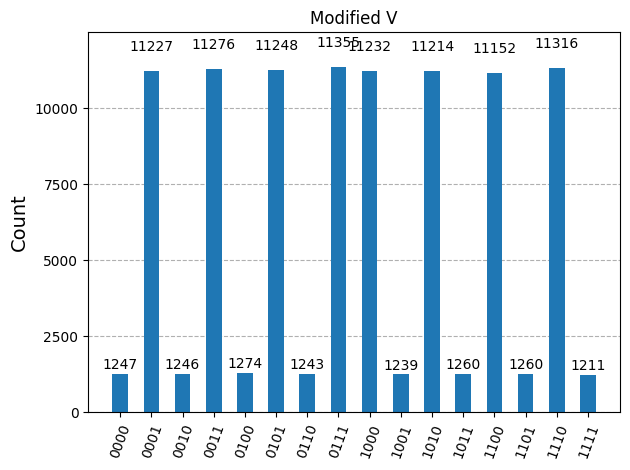

In [32]:
# Extract results
result = jobD.result()
counts = result.get_counts()

# Energy
ene_V=(2*k**2)/(np.sqrt(h**2+k**2))

# Error array
error_V=[]

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_V += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_V.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

# Save result
Modified_V = ene_V

# Print results
print(f"V = {ene_V} ± {np.std(error_V)/np.sqrt(n_shots)}")
plot_histogram(counts, title="Modified V")

### Compare results

Shows Theoretical, Modified and Article values of $E_B$.

There's some sthatistical variance with the simulation results.

In [33]:
# Theoretical Value of E_B
phi = np.arctan2(h*k, h**2 + 2*k**2)/2
E_B = -(h*k* np.sin(2*phi) - (h**2+2*k**2) * (1-np.cos(2*phi))) / np.sqrt(h**2 + k**2)

print(f"""
Theoretical = {E_B}
Modified =    {Modified_H + Modified_V}
Article =     {Article_H + Modified_H}
""")


Theoretical = -0.14252416604277626
Modified =    -0.14653416604277586
Article =     1.1112308830135313

